In [1]:
# Librerias para manejo de datos
import pandas as pd
import numpy as np

# Librerias para preprocesamiento y visualizacion de datos
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para implementar redes neuronales
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

# Preparando Datos

## Variables a utilizar:
- production_date
- genres
- runtime_minutes
- director_name
- movie_average
- movie_numerOfVotes	
- approval_Index	
- Production budget
- Domestic gross
- Worldwide gross $
## Variable a predecir
- movie_averageRating

In [2]:
# Load dataset
data = pd.read_csv('dataset.csv')
# Remove first and last column
columns_to_drop = ['director_professions', 'director_birthYear', 'director_deathYear' ] # ! Leaving movie_title just for visualization
data.drop(columns_to_drop, inplace=True, axis=1)
new_column_names = ['title','production_date', 'genres', 'runtime_minutes', 'director', 'average_rating', 'num_votes', 'approval_index', 'prod_budget', 'domestic_gross', 'worldwide_gross']
data.columns = new_column_names
data.replace('-', np.nan, inplace=True)
# Remove NA values
data = data.dropna()
# Encode genres and director
le = preprocessing.LabelEncoder()
data['director'] = le.fit_transform(data['director'])
# Encode genres, separate them by comma. Create a column for each genre
data['genres'] = data['genres'].str.split(',')

genres = data['genres']
data = data.join(data['genres'].str.join('|').str.get_dummies())
# Drop genres column
data.drop(columns=['genres'], inplace=True)
data.drop(columns=data.columns[-1], inplace=True)
# Convert production_date to datetime seconds since epoch
data['production_date'] = pd.to_datetime(data['production_date'])
data['production_date'] = (data['production_date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta(seconds=1)

# lowercase column names
data.columns = map(str.lower, data.columns)
# show all columns
pd.set_option('display.max_columns', None)
data.head()

,title,production_date,runtime_minutes,director,average_rating,num_votes,approval_index,prod_budget,domestic_gross,worldwide_gross,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,Avatar: The Way of Water,1670544000,192.0,664,7.8,277543.0,7.061101,460000000,667830256,2265935552,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pirates of the Caribbean: On Stranger Tides,1305849600,137.0,1445,6.6,533763.0,6.272064,379000000,241071802,1045713802,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Avengers: Age of Ultron,1429660800,141.0,899,7.3,870573.0,7.214013,365000000,459005868,1395316979,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,Justice League,1510531200,120.0,1829,6.1,456977.0,5.717212,300000000,229024295,655945209,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Spectre,1444089600,148.0,1531,6.8,445461.0,6.375644,300000000,200074175,879077344,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
data.to_csv('data/dataset_clean.csv', index=False)

## Analizando Datos

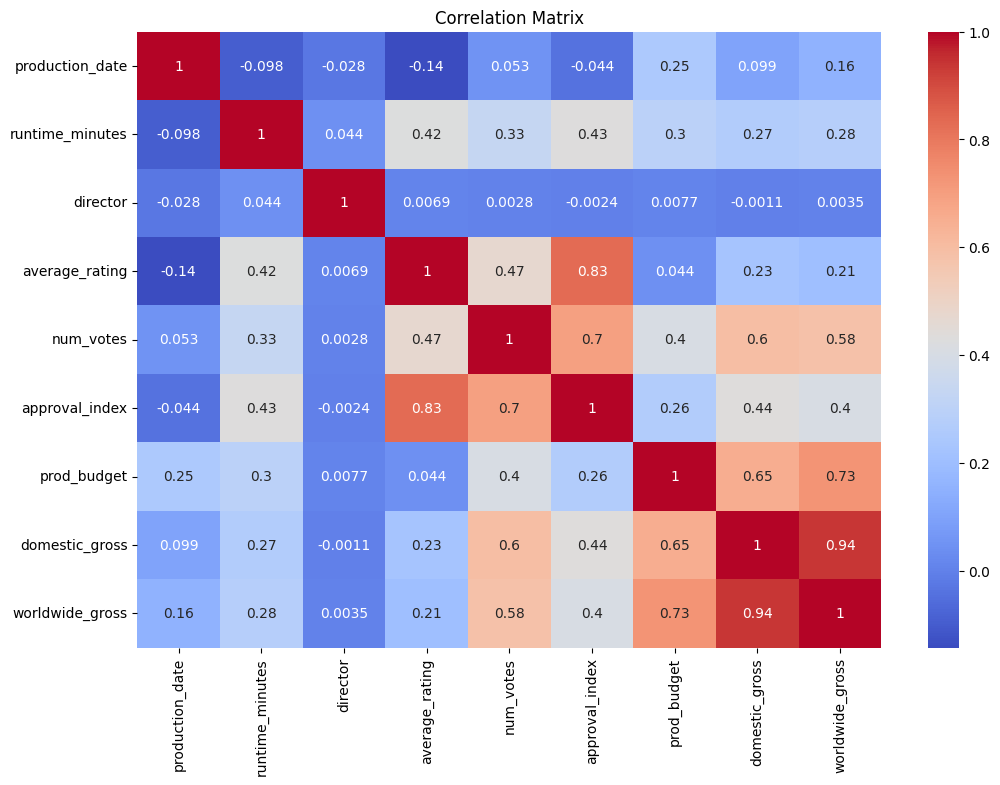

In [3]:
# Correlation matrix to show which variables are more correlated with the target variable
correlation_matrix = data[data.columns[:10]].drop(columns=['title'],).corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# Show the plot
plt.show()

